In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
import pandas as pd
import numpy as np

## 1.Reading and understanding the data


In [120]:
# Load the data to dataframe

day = pd.read_csv('day.csv')
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [121]:
# Check if there are any null values present in the dataset

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- **Since there are no null values present ,we are proceeding as such.**

In [122]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Visualizing the data

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

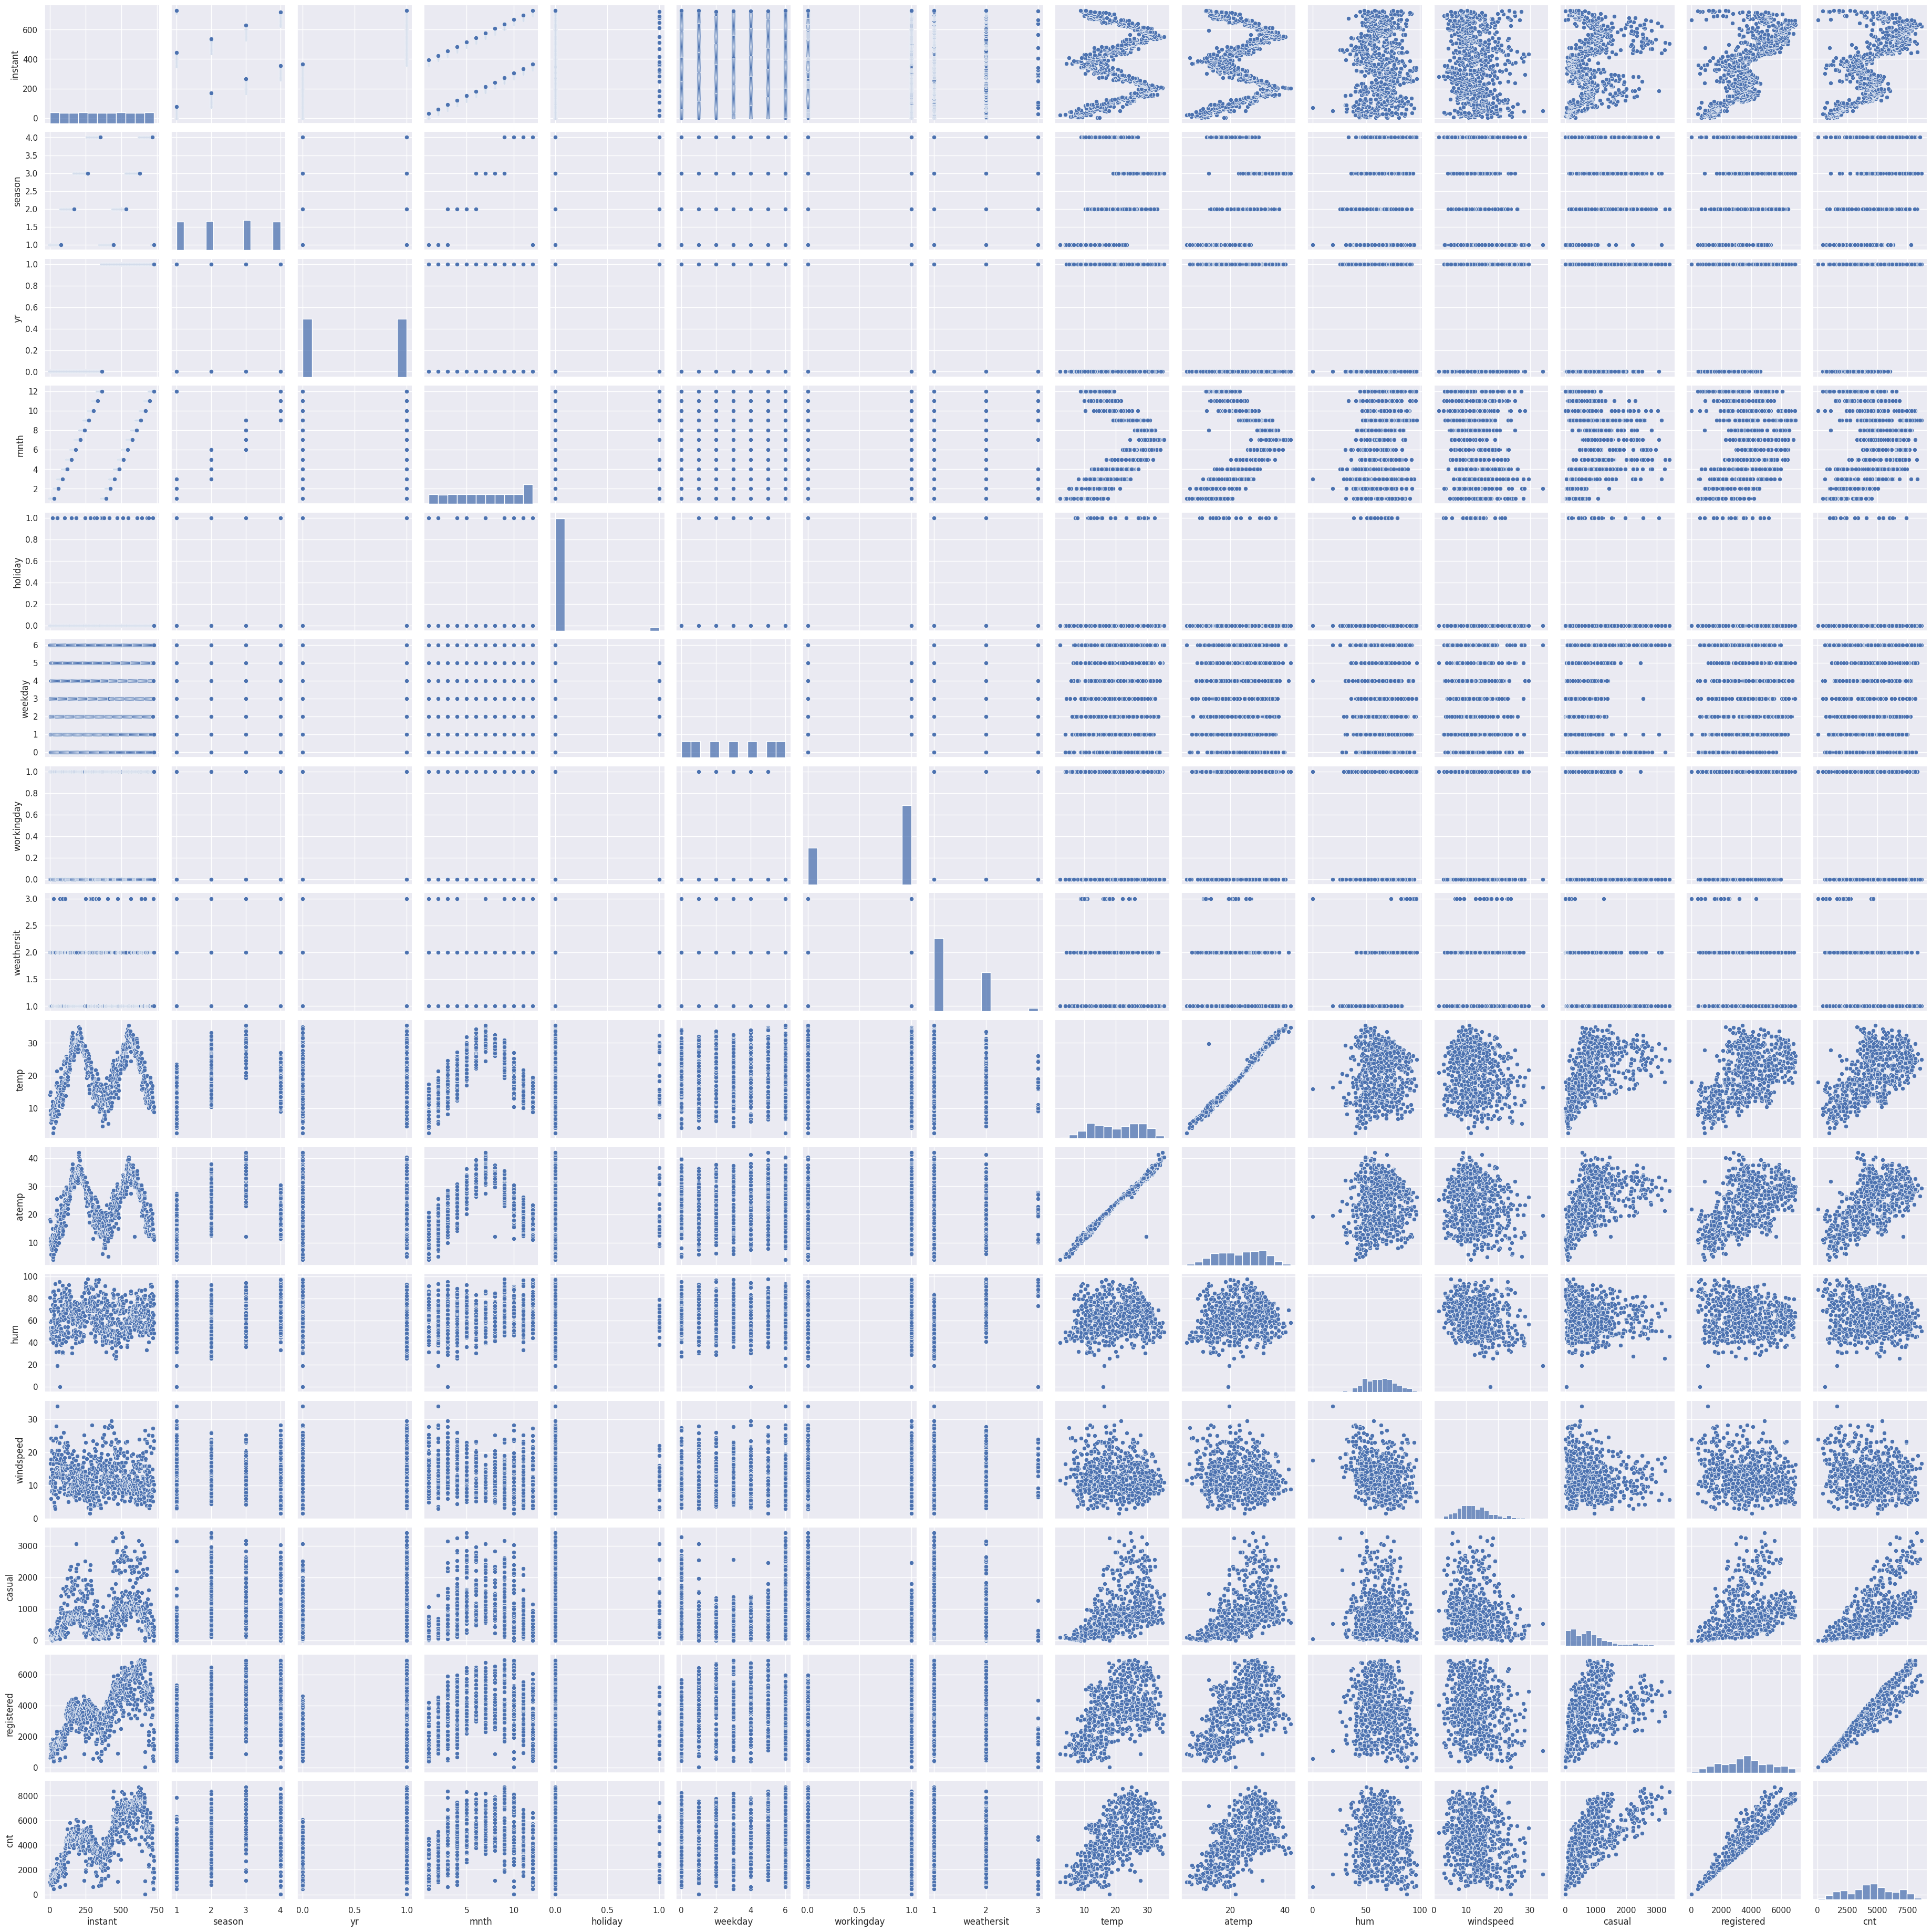

In [124]:
# Plotting a pairplot to check relations between variables

sns.set(rc={"figure.figsize":(15, 15)}) 
sns.pairplot(day)
plt.show()

### From this pairplot certain observations could be drawn 
- temp and atemp have a linear relationship
- temp and atemp have somewhat linear relationship between casual,registered and cnt variables,which implies when the temperature increases more people tend to rent out bikes

<Axes: xlabel='week', ylabel='cnt'>

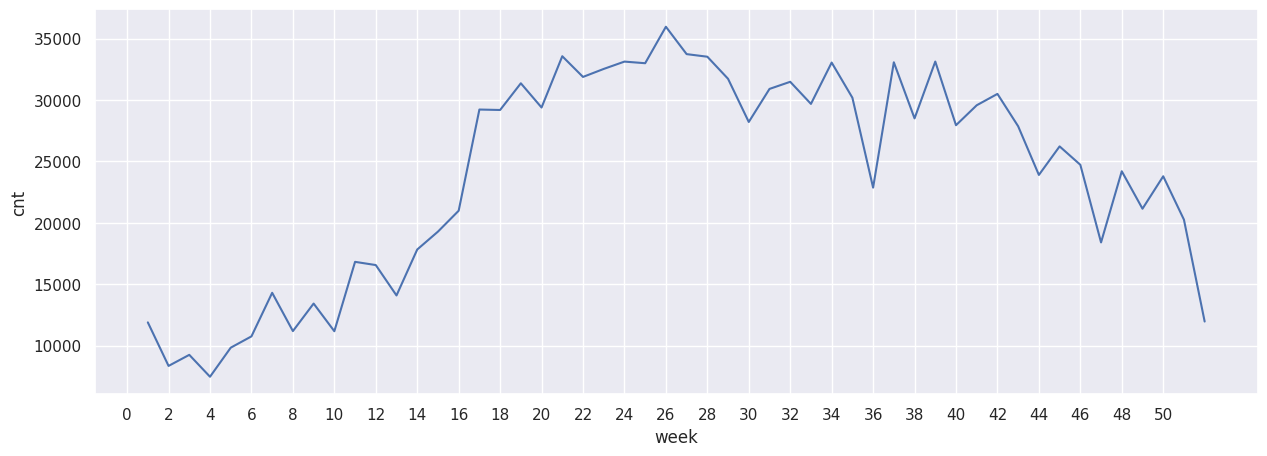

In [125]:
# Plotting each year's data seperately inorder to find if there are any patterns and if it is specific to a year

plt.figure(figsize = (15, 5))
plt.xticks(range(0,52,2))
yr_1_data = day[day["yr"]==0]
yr_1_data["datetime"] = pd.to_datetime(yr_1_data["dteday"],format= '%d-%m-%Y')
yr_1_data["week"] = yr_1_data["datetime"].dt.isocalendar().week.astype(int)
yr_1_data = yr_1_data.drop("datetime",axis=1)
week_datetime = yr_1_data.groupby("week").sum()
sns.lineplot(week_datetime,x="week",y="cnt")

- **In the first year graph starts to increase after 16 weeks,starting from May and declines after 42 weeks i.e after October.So the months between May-October has good number bike renters.**
- **And this year reaches a peak above 35000 renters per week,mostly staying between 30k-35k.**

<Axes: xlabel='week', ylabel='cnt'>

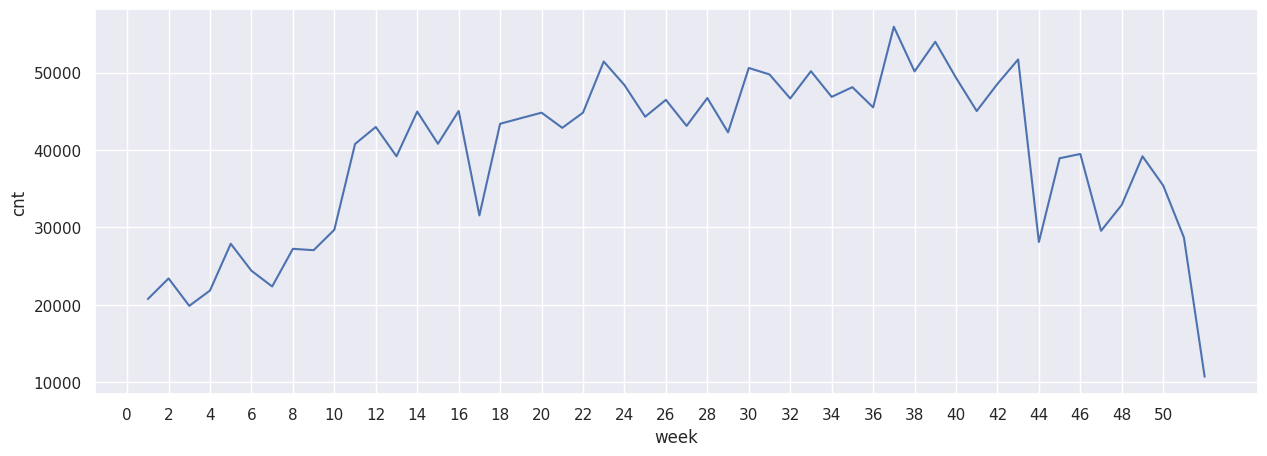

In [126]:
plt.figure(figsize=(15, 5))
plt.xticks(range(0,52,2))
yr_2_data=day[day["yr"]==1]
yr_2_data["datetime"] = pd.to_datetime(yr_2_data["dteday"],format= '%d-%m-%Y')
yr_2_data["week"] = yr_2_data["datetime"].dt.isocalendar().week.astype(int)
yr_2_data = yr_2_data.drop("datetime",axis=1)
week_datetime = yr_2_data.groupby("week").sum()
sns.lineplot(week_datetime,x="week",y="cnt")

- **This year business enters growth pace after 10 weeks which is from month of March,and starts to decline after 42 weeks which is from October.So from March to October the company had good business.**
- **This year peaks at a maximum of above 50000 renters a week,and it sustains mostly between 40k to 50k.**
- **We can derive observations, that the second year had good business and it started its growth pace very early in March compared to first year's start in May**

In [127]:
# Dropping dteday and instant as they dont add value
day=day.drop(["dteday","instant"],axis=1)

<Figure size 2000x1200 with 0 Axes>

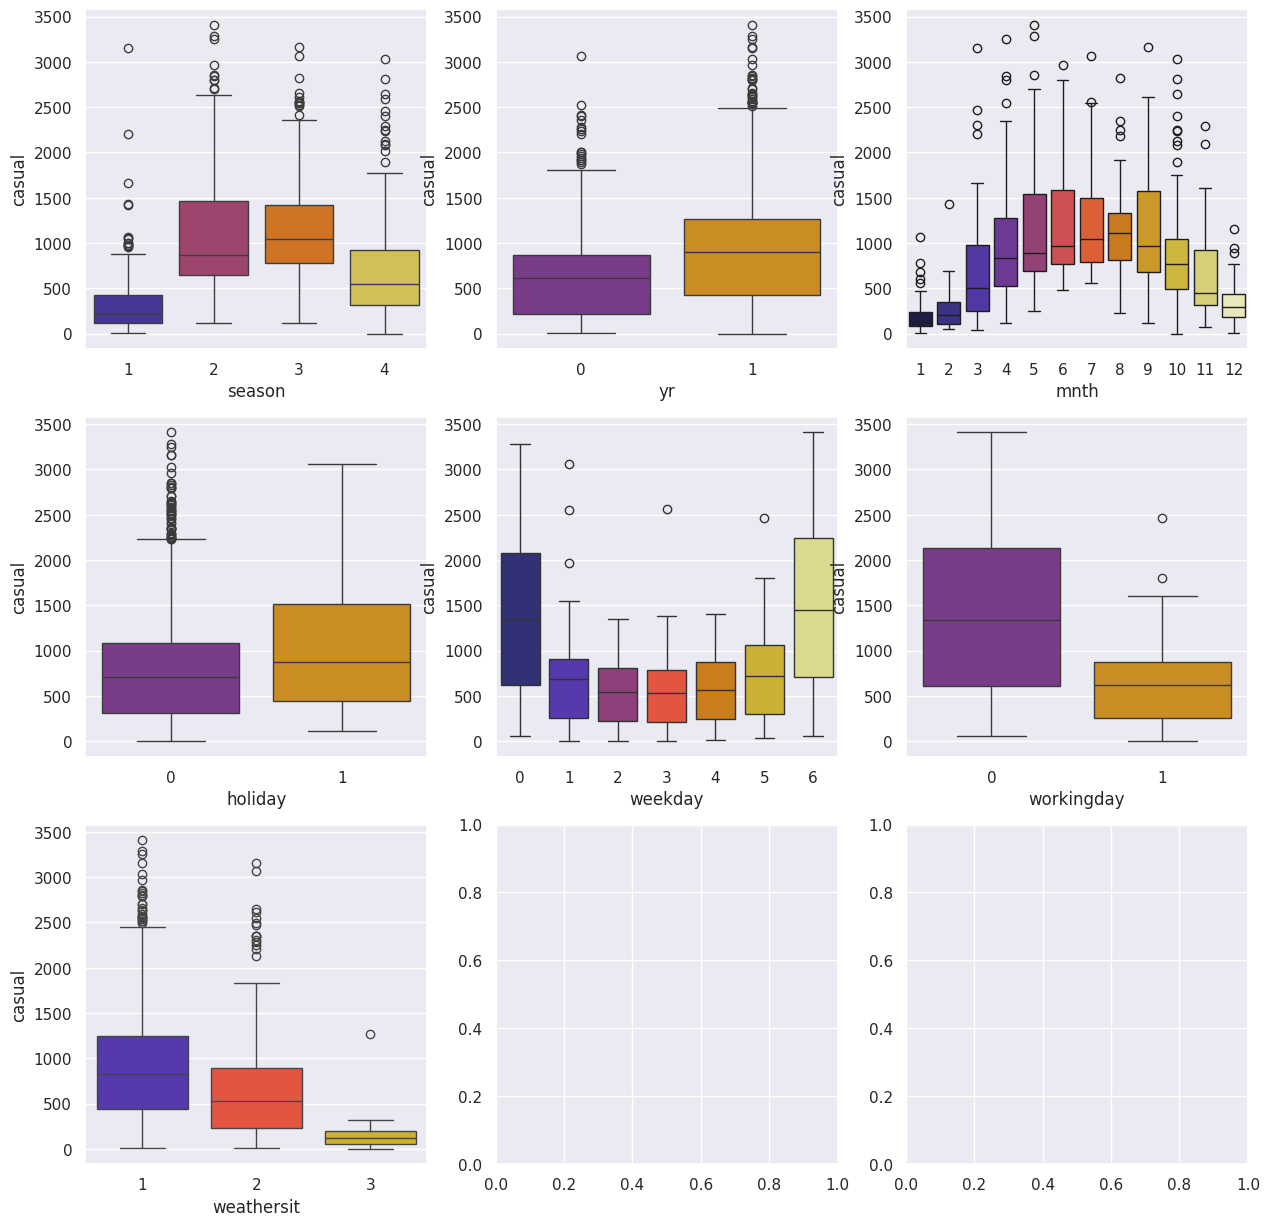

In [128]:
# Plotting and finding relationship between casual renters and categorical variables

plt.figure(figsize=(20, 12))
fig ,ax=plt.subplots(3,3)
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'casual', data = day,palette ="CMRmap")
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = day,palette ="CMRmap")
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'casual', data = day,palette ="CMRmap")
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'casual', data = day,palette ="CMRmap")
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'casual', data = day,palette ="CMRmap")
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'casual', data = day,palette ="CMRmap")
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'casual', data = day,palette ="CMRmap")
fig.show()

## Observeations made from casual renters

- More people rent on summer and fall compared to winter and spring
- We can clearly see that casual renters prefer holidays and non working days,so we can observe Saturdays and Sundays being good for business days
- Adverse weather conditions make casual users not come out ,so very less number of renters
- From this see can bring a conclusion that most of the casual renters rent bike to go out and not for their work,so it could not be consistent

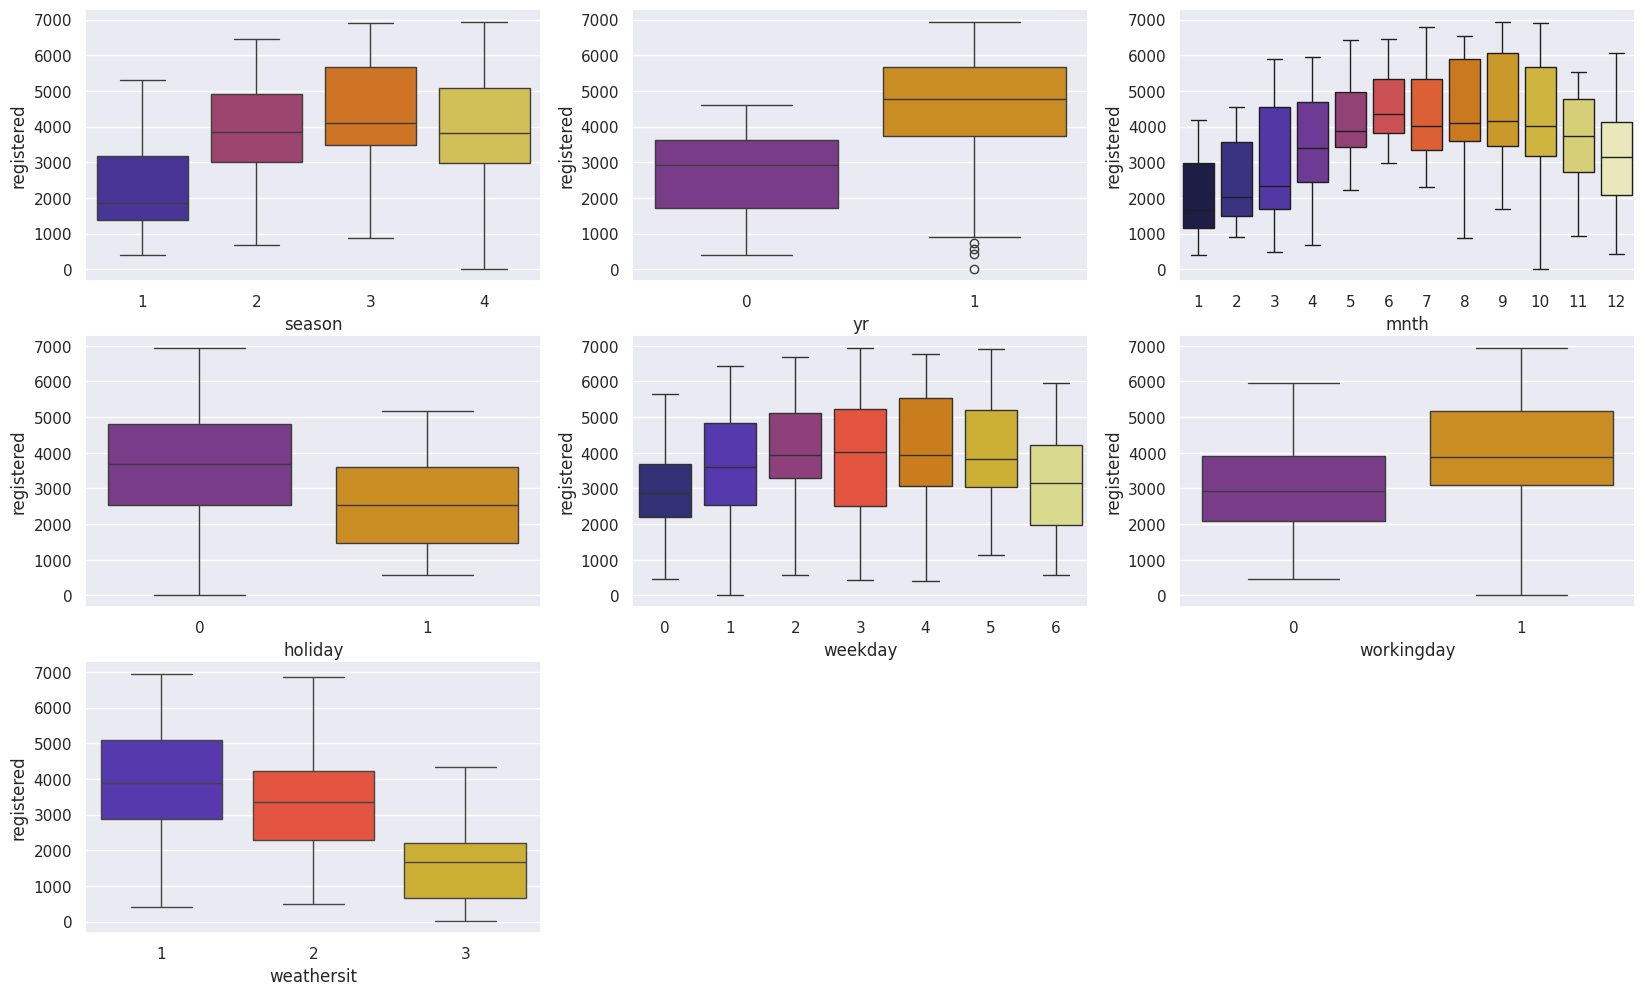

In [129]:
# Plotting and finding relationship between registered renters and categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'registered', data = day,palette ="CMRmap")
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'registered', data = day,palette ="CMRmap")
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'registered', data = day,palette ="CMRmap")
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'registered', data = day,palette ="CMRmap")
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'registered', data = day,palette ="CMRmap")
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'registered', data = day,palette ="CMRmap")
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'registered', data = day,palette ="CMRmap")
plt.show()

## Observations from registered renters

- Here we can see workingdays and non holidays have a good impact on registered users.
- Weekdays and weekend have only slight change.
- Registered users are practiced to rent bike so even on weekend they prefer that mode of transport.
- Second year had major increase in registered renters,may be due to good marketing strategies in that year.

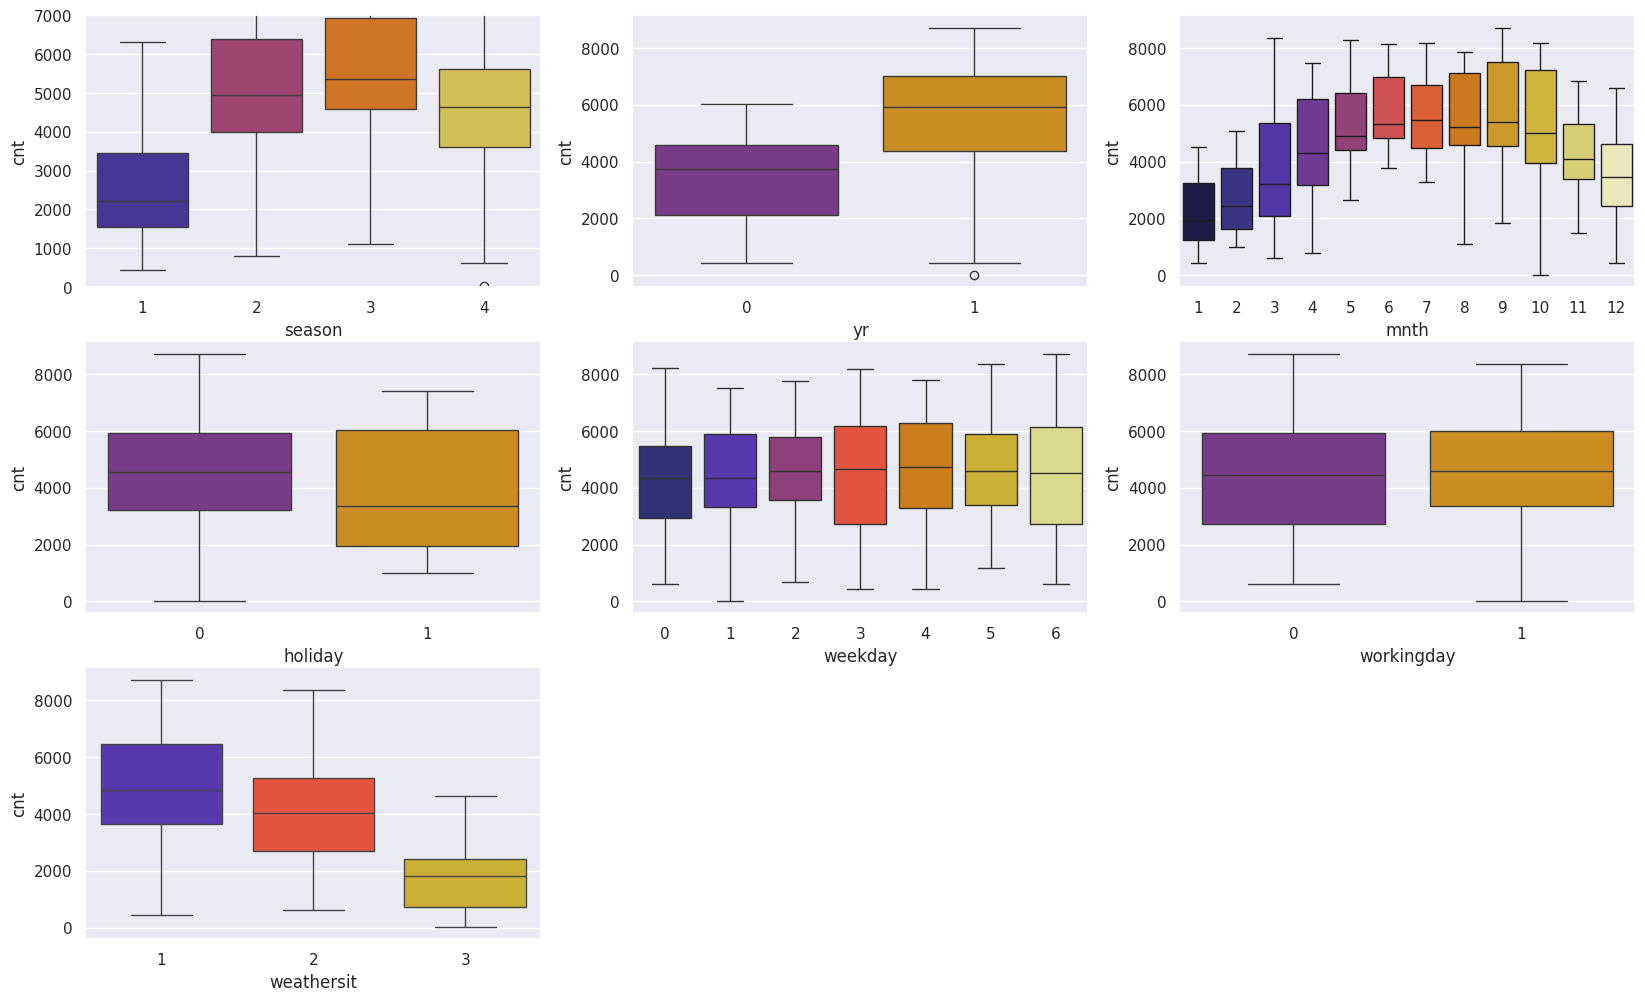

In [130]:
# Plotting and finding relationship between total renters and categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.ylim(0,7000)
sns.boxplot(x = 'season', y = 'cnt', data = day,palette ="CMRmap")
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day,palette ="CMRmap")
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day,palette ="CMRmap")
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day,palette ="CMRmap")
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day,palette ="CMRmap")
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day,palette ="CMRmap")
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day,palette ="CMRmap")
plt.show()

## Observations on the whole

- On the whole we can't bring up significant changes,but still we can see that holidays and non working days has 25th percentile less than working days.
- We can come to a observation that registered people dominate the renters,since working days showcase advantage to the company.

### Common observations

- Fall and summers still pose as good seasons having more renters.
- Clear and misty weather give out good numbers compared to snowy weather.
- Mid months have good business.

In [131]:
# Dropping casual and registered as they are not part of features,but of target

day= day.drop(["casual","registered"],axis=1)

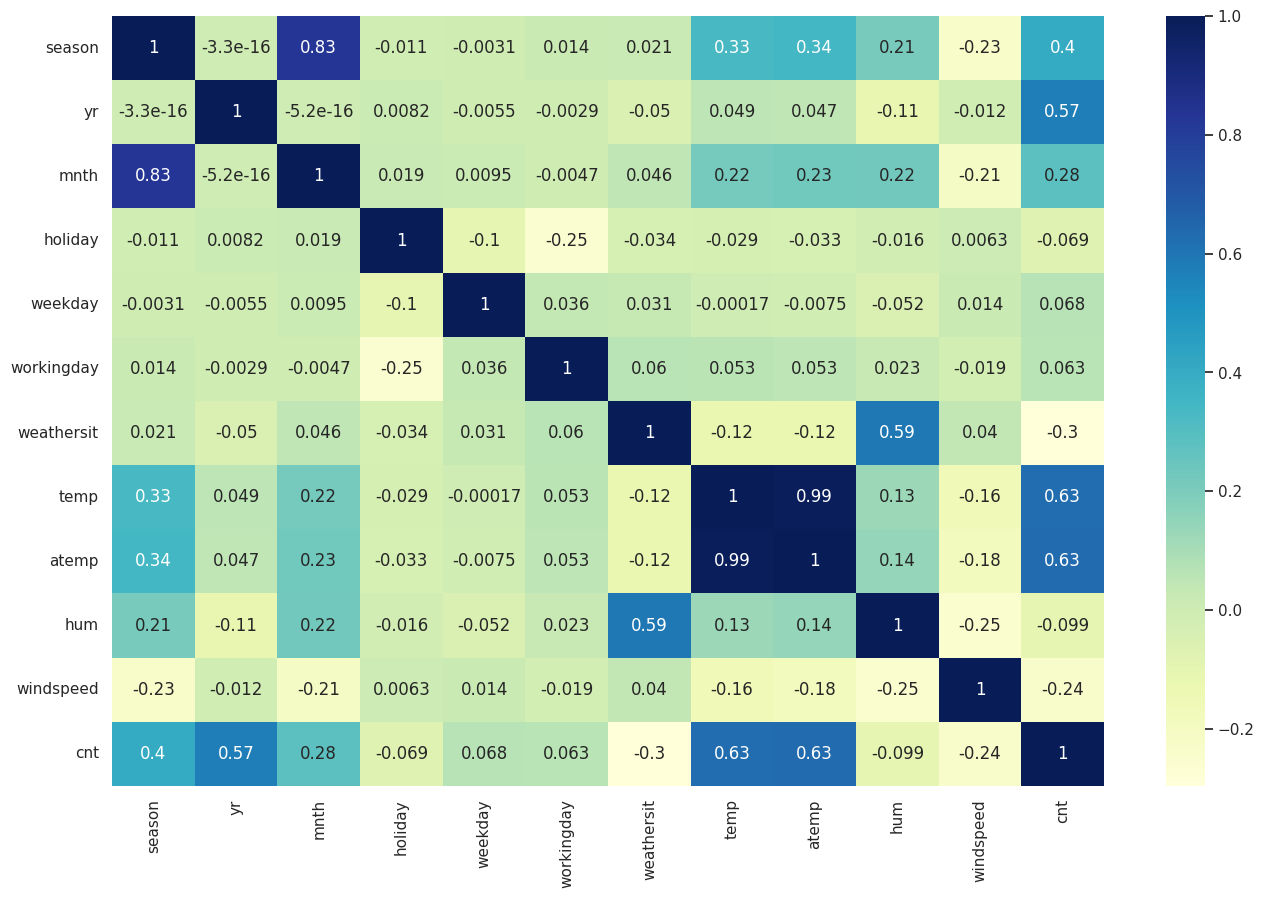

In [132]:
# Plotting heat map to analyse linear relationship between variables

plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

- **We can see higher correlation between temp and atemp.**
- **Season and Month are also correlated which is understandable.**
- **Target variable is correlated with temp ,year and season which is the same we observed from previous graphs.**

## 2. Data Preparation

In [133]:
# Dropping temp ,since atemp and temp are highly correlated

day = day.drop("temp",axis=1) 


In [134]:
# Convert the categorical variables to names so that it can be converted to dummy variables
# Assuming weekdays to start from Sunday to Saturday as 0-7

day["season"] = day["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})
day["weekday"] = day["weekday"].map({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"})
day["weathersit"] = day["weathersit"].map({1:"clear",2:"mist",3:"light_snow",4:"heavy_rain"})

day.head()


season  yr  mnth  holiday    weekday  workingday weathersit     atemp  \
0  spring   0     1        0   saturday           0       mist  18.18125   
1  spring   0     1        0     sunday           0       mist  17.68695   
2  spring   0     1        0     monday           1      clear   9.47025   
3  spring   0     1        0    tuesday           1      clear  10.60610   
4  spring   0     1        0  wednesday           1      clear  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [135]:
# Create dummy variables for all the mapped categorical variables

season = pd.get_dummies(day['season'],drop_first=True)
weekday = pd.get_dummies(day['weekday'],drop_first=True)
weathersit = pd.get_dummies(day['weathersit'],drop_first=True)

day.head()

season  yr  mnth  holiday    weekday  workingday weathersit     atemp  \
0  spring   0     1        0   saturday           0       mist  18.18125   
1  spring   0     1        0     sunday           0       mist  17.68695   
2  spring   0     1        0     monday           1      clear   9.47025   
3  spring   0     1        0    tuesday           1      clear  10.60610   
4  spring   0     1        0  wednesday           1      clear  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [136]:
# Add the created dummy variables to the original data frame

processed_day_data = pd.concat([day,season,weekday,weathersit],axis=1)
processed_day_data.head()

season  yr  mnth  holiday    weekday  workingday weathersit     atemp  \
0  spring   0     1        0   saturday           0       mist  18.18125   
1  spring   0     1        0     sunday           0       mist  17.68695   
2  spring   0     1        0     monday           1      clear   9.47025   
3  spring   0     1        0    tuesday           1      clear  10.60610   
4  spring   0     1        0  wednesday           1      clear  11.46350   

       hum  windspeed  ...  summer  winter  monday  saturday  sunday  \
0  80.5833  10.749882  ...   False   False   False      True   False   
1  69.6087  16.652113  ...   False   False   False     False    True   
2  43.7273  16.636703  ...   False   False    True     False   False   
3  59.0435  10.739832  ...   False   False   False     False   False   
4  43.6957  12.522300  ...   False   False   False     False   False   

   thursday  tuesday  wednesday  light_snow   mist  
0     False    False      False       False   True  
1     False    False      False       False   True  
2     False    False      False       False  False  
3     False     True      False       False  False  
4     False    False       True       False  False  

[5 rows x 22 columns]

In [137]:
# Removing the original categorical variables from the dataframe

processed_day_data = processed_day_data.drop(["season","weekday","weathersit"],axis=1)
processed_day_data.head()

yr  mnth  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
0   0     1        0           0  18.18125  80.5833  10.749882   985    True   
1   0     1        0           0  17.68695  69.6087  16.652113   801    True   
2   0     1        0           1   9.47025  43.7273  16.636703  1349    True   
3   0     1        0           1  10.60610  59.0435  10.739832  1562    True   
4   0     1        0           1  11.46350  43.6957  12.522300  1600    True   

   summer  winter  monday  saturday  sunday  thursday  tuesday  wednesday  \
0   False   False   False      True   False     False    False      False   
1   False   False   False     False    True     False    False      False   
2   False   False    True     False   False     False    False      False   
3   False   False   False     False   False     False     True      False   
4   False   False   False     False   False     False    False       True   

   light_snow   mist  
0       False   True  
1       False   True  
2       False  False  
3       False  False  
4       False  False

In [138]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(processed_day_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [139]:
# Pop the target variable cnt and save in a different data frame

y_train = df_train.pop("cnt")
x_train = df_train
y_test = df_test.pop("cnt")
x_test = df_test

print("Train X shape : ",x_train.shape,"\nTrain Y shape : ",y_train.shape)
print("Test X shape : ",x_test.shape,"\nTest Y shape : ",y_test.shape)

Train X shape :  (510, 18) 
Train Y shape :  (510,)
Test X shape :  (219, 18) 
Test Y shape :  (219,)


In [140]:
# Normalise the data including both categorical and numerical,since normalizing categorical would return same values too.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_norm = pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_train_norm.head()

yr      mnth  holiday  workingday     atemp       hum  windspeed  \
653  1.0  0.818182      0.0         1.0  0.501133  0.575354   0.300794   
576  1.0  0.545455      0.0         1.0  0.766351  0.725633   0.264686   
426  1.0  0.181818      0.0         0.0  0.438975  0.640189   0.255342   
728  1.0  1.000000      0.0         0.0  0.200348  0.498067   0.663106   
482  1.0  0.272727      0.0         0.0  0.391735  0.504508   0.188475   

     spring  summer  winter  monday  saturday  sunday  thursday  tuesday  \
653     0.0     0.0     1.0     0.0       0.0     0.0       0.0      1.0   
576     0.0     0.0     0.0     0.0       0.0     0.0       0.0      1.0   
426     1.0     0.0     0.0     0.0       1.0     0.0       0.0      0.0   
728     1.0     0.0     0.0     0.0       0.0     1.0       0.0      0.0   
482     0.0     1.0     0.0     0.0       1.0     0.0       0.0      0.0   

     wednesday  light_snow  mist  
653        0.0         0.0   0.0  
576        0.0         0.0   0.0  
426        0.0         0.0   1.0  
728        0.0         0.0   0.0  
482        0.0         0.0   1.0

In [141]:
# Check the normalized values

x_train_norm.describe()

yr        mnth     holiday  workingday       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.504456    0.025490    0.676471    0.512989    0.650369   
std      0.500429    0.315338    0.157763    0.468282    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.181818    0.000000    0.000000    0.332086    0.538643   
50%      1.000000    0.545455    0.000000    1.000000    0.526811    0.653714   
75%      1.000000    0.818182    0.000000    1.000000    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed      spring      summer     winter      monday    saturday  \
count  510.000000  510.000000  510.000000  510.00000  510.000000  510.000000   
mean     0.320768    0.243137    0.245098    0.24902    0.150980    0.154902   
std      0.169797    0.429398    0.430568    0.43287    0.358381    0.362166   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.199179    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.296763    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      0.414447    0.000000    0.000000    0.00000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

           sunday    thursday     tuesday   wednesday  light_snow        mist  
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean     0.143137    0.133333    0.131373    0.158824    0.029412    0.343137  
std      0.350557    0.340268    0.338139    0.365870    0.169124    0.475223  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

- **All the values lie between 0 and 1**

## 3. Model building

In [142]:
# Create a statsmodel with all the variables before feature selection,to check baseline metrics

import statsmodels.api as sm

#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train_cnst = sm.add_constant(x_train_norm)

# create a fitted model in one line
lm_1 = sm.OLS(y_train,x_train_cnst).fit()

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.35e-177
Time:                        15:31:34   Log-Likelihood:                -4134.1
No. Observations:                 510   AIC:                             8304.
Df Residuals:                     492   BIC:                             8380.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1961.4568    265.169      7.397      0.000    1440.454    2482.460
yr          2028.4577     73.652     27.541      0.000    1883.746    2173.169
mnth         119.6713    227.188      0.527      0.599    -326.707     566.050
holiday      106.8089    211.654      0.505      0.614    -309.048     522.666
workingday   808.4447    103.581      7.805      0.000     604.928    1011.961
atemp       4268.7267    307.123     13.899      0.000    3665.292    4872.161
hum        -1086.2061    342.768     -3.169      0.002   -1759.676    -412.736
windspeed  -1407.4163    233.299     -6.033      0.000   -1865.801    -949.031
spring      -783.6732    195.177     -4.015      0.000   -1167.156    -400.190
summer       277.3344    132.677      2.090      0.037      16.651     538.018
winter       572.7608    154.947      3.696      0.000     268.321     877.200
monday      -240.5226    141.156     -1.704      0.089    -517.866      36.821
saturday     768.9943    116.858      6.581      0.000     539.391     998.597
sunday       277.2089    121.481      2.282      0.023      38.523     515.894
thursday    -117.3159    142.567     -0.823      0.411    -397.432     162.800
tuesday     -196.6720    142.906     -1.376      0.169    -477.453      84.109
wednesday    -51.1125    137.168     -0.373      0.710    -320.621     218.395
light_snow -2143.7690    240.852     -8.901      0.000   -2616.995   -1670.543
mist        -515.8614     95.983     -5.375      0.000    -704.448    -327.275
==============================================================================
Omnibus:                       74.039   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.811
Skew:                          -0.723   Prob(JB):                     3.02e-43
Kurtosis:                       5.669   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- **The R square and Adjusted R square have minor differences,so that is good.**
- **But most of the features have p value greater than 0.05,so we should choose features that will be significant.**

In [143]:
# First we will proceed with automatic feature selection and then handpick rest of the features

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [144]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(x_train_norm, y_train)

rfe = RFE(estimator=lm,n_features_to_select= 13)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [145]:
# Show the ranking from rfe

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 6),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 4),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('monday', True, 1),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 2),
 ('tuesday', True, 1),
 ('wednesday', False, 3),
 ('light_snow', True, 1),
 ('mist', True, 1)]

In [146]:
# Displaying the chosen column names

col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'spring', 'summer', 'winter',
       'monday', 'saturday', 'sunday', 'tuesday', 'light_snow', 'mist'],
      dtype='object')

In [147]:
# Displaying the ignored column names

x_train.columns[~rfe.support_]

Index(['mnth', 'hum', 'windspeed', 'thursday', 'wednesday'], dtype='object')

In [148]:
# Using the selected column names construct a dataframe

x_train_rfe = x_train_norm[col]

In [149]:
# Fit the new dataframe with chosen features

x_train_cnst = sm.add_constant(x_train_rfe)

lm_2 = sm.OLS(y_train,x_train_cnst).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     185.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.06e-174
Time:                        15:31:37   Log-Likelihood:                -4153.8
No. Observations:                 510   AIC:                             8334.
Df Residuals:                     497   BIC:                             8389.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1190.8121    200.727      5.932      0.000     796.433    1585.191
yr          2042.1492     75.595     27.014      0.000    1893.624    2190.674
holiday     -122.0062    206.492     -0.591      0.555    -527.710     283.698
workingday   607.3575     84.387      7.197      0.000     441.559     773.156
atemp       4211.9608    305.871     13.770      0.000    3611.001    4812.921
spring      -938.7238    176.733     -5.312      0.000   -1285.960    -591.488
summer       135.5297    119.609      1.133      0.258     -99.473     370.532
winter       542.7566    142.125      3.819      0.000     263.517     821.996
monday      -202.2888    116.157     -1.742      0.082    -430.509      25.931
saturday     605.4579    106.261      5.698      0.000     396.681     814.234
sunday       100.0030    109.560      0.913      0.362    -115.255     315.261
tuesday     -163.4833    118.497     -1.380      0.168    -396.301      69.334
light_snow -2574.8950    226.175    -11.385      0.000   -3019.273   -2130.517
mist        -671.5869     80.161     -8.378      0.000    -829.082    -514.092
==============================================================================
Omnibus:                       75.097   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.197
Skew:                          -0.729   Prob(JB):                     2.04e-44
Kurtosis:                       5.710   Cond. No.                     5.99e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- **The R square and Adjusted R square values are looking fine.**
- **But still there are so many insignificant p values.**
- **Holiday has the highest p value ,so we will check its VIF.**

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  29.67
8     saturday   7.33
9       sunday   6.98
4       spring   4.11
3        atemp   3.01
6       winter   2.70
1      holiday   2.17
5       summer   1.89
7       monday   1.24
10     tuesday   1.15
11  light_snow   1.04
12        mist   1.04
0           yr   1.02

- **Working day has the highest VIF value but it has 0 p value ,which implies it is very significant so we cant remove it right away.**
- **Removing Holiday which even though has low VIF than working day still poses multicollinearlity could be efficient since it has very high p value, and has no significance in the model**

In [151]:
# Dropping Holiday

x_train_rfe.drop("holiday",axis=1,inplace=True)
x_train_rfe.columns

Index(['yr', 'workingday', 'atemp', 'spring', 'summer', 'winter', 'monday',
       'saturday', 'sunday', 'tuesday', 'light_snow', 'mist'],
      dtype='object')

In [152]:
# Building 3rd model with Sunday removed.

x_train_cnst = sm.add_constant(x_train_rfe)
lm_3 = sm.OLS(y_train,x_train_cnst).fit()

lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     185.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.06e-174
Time:                        15:31:37   Log-Likelihood:                -4153.8
No. Observations:                 510   AIC:                             8334.
Df Residuals:                     497   BIC:                             8389.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1068.8058    345.177      3.096      0.002     390.620    1746.992
yr          2042.1492     75.595     27.014      0.000    1893.624    2190.674
workingday   729.3637    248.946      2.930      0.004     240.248    1218.479
atemp       4211.9608    305.871     13.770      0.000    3611.001    4812.921
spring      -938.7238    176.733     -5.312      0.000   -1285.960    -591.488
summer       135.5297    119.609      1.133      0.258     -99.473     370.532
winter       542.7566    142.125      3.819      0.000     263.517     821.996
monday      -202.2888    116.157     -1.742      0.082    -430.509      25.931
saturday     727.4641    269.042      2.704      0.007     198.865    1256.063
sunday       222.0092    270.251      0.821      0.412    -308.966     752.984
tuesday     -163.4833    118.497     -1.380      0.168    -396.301      69.334
light_snow -2574.8950    226.175    -11.385      0.000   -3019.273   -2130.517
mist        -671.5869     80.161     -8.378      0.000    -829.082    -514.092
==============================================================================
Omnibus:                       75.097   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.197
Skew:                          -0.729   Prob(JB):                     2.04e-44
Kurtosis:                       5.710   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1   workingday  15.42
2        atemp  12.00
7     saturday   4.36
8       sunday   4.18
3       spring   3.27
5       winter   2.46
0           yr   2.07
4       summer   2.07
11        mist   1.56
6       monday   1.36
9      tuesday   1.32
10  light_snow   1.07

- **Next Sunday has the highest p value.**
- **Even though Sunday has low VIF ,working day still has high VIF,we are gonna remove Sunday,since removing the right variable may reduce the VIF of working day,which is still a very significant variable.**

In [154]:
# Dropping Sunday

x_train_rfe.drop("sunday",axis=1,inplace=True)
x_train_rfe.columns

Index(['yr', 'workingday', 'atemp', 'spring', 'summer', 'winter', 'monday',
       'saturday', 'tuesday', 'light_snow', 'mist'],
      dtype='object')

In [155]:
# Building 4th model

x_train_cnst = sm.add_constant(x_train_rfe)
lm_4 = sm.OLS(y_train,x_train_cnst).fit()

lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.02e-175
Time:                        15:31:38   Log-Likelihood:                -4154.1
No. Observations:                 510   AIC:                             8332.
Df Residuals:                     498   BIC:                             8383.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1257.2357    257.858      4.876      0.000     750.611    1763.860
yr          2043.8118     75.543     27.055      0.000    1895.389    2192.234
workingday   544.2880    105.878      5.141      0.000     336.265     752.311
atemp       4216.6595    305.718     13.793      0.000    3616.004    4817.315
spring      -940.2125    176.666     -5.322      0.000   -1287.315    -593.110
summer       138.5386    119.514      1.159      0.247     -96.276     373.353
winter       542.2839    142.077      3.817      0.000     263.139     821.429
monday      -233.8374    109.589     -2.134      0.033    -449.152     -18.523
saturday     535.1469    132.536      4.038      0.000     274.747     795.546
tuesday     -171.1610    118.090     -1.449      0.148    -403.176      60.854
light_snow -2572.2819    226.079    -11.378      0.000   -3016.468   -2128.095
mist        -670.0743     80.113     -8.364      0.000    -827.476    -512.673
==============================================================================
Omnibus:                       76.506   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.488
Skew:                          -0.739   Prob(JB):                     1.45e-45
Kurtosis:                       5.744   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1   workingday  4.94
2        atemp  4.57
0           yr  2.06
7     saturday  1.81
3       spring  1.65
4       summer  1.64
5       winter  1.58
10        mist  1.55
8      tuesday  1.31
6       monday  1.29
9   light_snow  1.07

- **Keepig working day apart,now summer and atemp pose the competion where atemp has high VIF and summer has high p value.**
- **We can easily undersatnd that summer and atemp are related ,so removing summer could decrease the VIF of significant atemp.**

In [157]:
# Dropping summer

x_train_rfe.drop("summer",axis=1,inplace=True)
x_train_rfe.columns

Index(['yr', 'workingday', 'atemp', 'spring', 'winter', 'monday', 'saturday',
       'tuesday', 'light_snow', 'mist'],
      dtype='object')

In [158]:
# Building 5th model

x_train_cnst = sm.add_constant(x_train_rfe)
lm_5 = sm.OLS(y_train,x_train_cnst).fit()

lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.30e-176
Time:                        15:31:39   Log-Likelihood:                -4154.8
No. Observations:                 510   AIC:                             8332.
Df Residuals:                     499   BIC:                             8378.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1433.2114    208.505      6.874      0.000    1023.555    1842.868
yr          2046.6185     75.530     27.097      0.000    1898.222    2195.015
workingday   543.4599    105.912      5.131      0.000     335.371     751.549
atemp       4048.8411    269.359     15.031      0.000    3519.624    4578.058
spring     -1070.0743    136.650     -7.831      0.000   -1338.555    -801.594
winter       437.9751    109.986      3.982      0.000     221.882     654.068
monday      -232.9053    109.624     -2.125      0.034    -448.287     -17.524
saturday     533.7124    132.576      4.026      0.000     273.236     794.189
tuesday     -168.4417    118.107     -1.426      0.154    -400.490      63.607
light_snow -2580.1519    226.055    -11.414      0.000   -3024.289   -2136.015
mist        -668.0094     80.121     -8.338      0.000    -825.425    -510.593
==============================================================================
Omnibus:                       77.427   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.041
Skew:                          -0.748   Prob(JB):                     4.05e-46
Kurtosis:                       5.757   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  workingday  4.69
2       atemp  4.50
0          yr  2.05
6    saturday  1.75
9        mist  1.52
3      spring  1.48
4      winter  1.38
7     tuesday  1.31
5      monday  1.29
8  light_snow  1.07

- **Tuesday has high p value and low VIF, even then we are  removing it to retain the significant features and in hope to reduce VIF of working day which could be linear with tuesday.**

In [160]:
# Dropping tuesday

x_train_rfe.drop("tuesday",axis=1,inplace=True)
x_train_rfe.columns

Index(['yr', 'workingday', 'atemp', 'spring', 'winter', 'monday', 'saturday',
       'light_snow', 'mist'],
      dtype='object')

In [161]:
# Building 6th model

x_train_cnst = sm.add_constant(x_train_rfe)
lm_6 = sm.OLS(y_train,x_train_cnst).fit()

lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.22e-177
Time:                        15:31:40   Log-Likelihood:                -4155.9
No. Observations:                 510   AIC:                             8332.
Df Residuals:                     500   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1433.2138    208.721      6.867      0.000    1023.136    1843.292
yr          2047.0449     75.608     27.075      0.000    1898.497    2195.593
workingday   507.5286    102.978      4.928      0.000     305.205     709.852
atemp       4041.3382    269.586     14.991      0.000    3511.678    4570.998
spring     -1070.4792    136.791     -7.826      0.000   -1339.235    -801.723
winter       434.2577    110.069      3.945      0.000     218.003     650.512
monday      -197.9664    106.962     -1.851      0.065    -408.117      12.184
saturday     537.1149    132.692      4.048      0.000     276.413     797.817
light_snow -2565.0346    226.040    -11.348      0.000   -3009.139   -2120.930
mist        -666.3039     80.195     -8.309      0.000    -823.864    -508.743
==============================================================================
Omnibus:                       77.855   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.860
Skew:                          -0.743   Prob(JB):                     1.34e-47
Kurtosis:                       5.819   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       atemp  4.50
1  workingday  4.39
0          yr  2.05
6    saturday  1.75
8        mist  1.52
3      spring  1.48
4      winter  1.38
5      monday  1.23
7  light_snow  1.07

- **Dropping monday for the same reason as tuesday**

In [163]:
# Dropping monday

x_train_rfe.drop("monday",axis=1,inplace=True)
x_train_rfe.columns

Index(['yr', 'workingday', 'atemp', 'spring', 'winter', 'saturday',
       'light_snow', 'mist'],
      dtype='object')

In [164]:
# Building 7th model

x_train_cnst = sm.add_constant(x_train_rfe)
lm_7 = sm.OLS(y_train,x_train_cnst).fit()

lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.11e-178
Time:                        15:31:41   Log-Likelihood:                -4157.6
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     501   BIC:                             8371.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1405.2976    208.678      6.734      0.000     995.305    1815.290
yr          2039.8424     75.690     26.950      0.000    1891.133    2188.551
workingday   491.4124    102.858      4.778      0.000     289.327     693.498
atemp       4058.8570    270.071     15.029      0.000    3528.246    4589.468
spring     -1066.4571    137.105     -7.778      0.000   -1335.828    -797.086
winter       429.7755    110.308      3.896      0.000     213.051     646.500
saturday     559.6178    132.453      4.225      0.000     299.386     819.850
light_snow -2559.9827    226.570    -11.299      0.000   -3005.126   -2114.839
mist        -666.0010     80.389     -8.285      0.000    -823.941    -508.061
==============================================================================
Omnibus:                       77.555   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.111
Skew:                          -0.734   Prob(JB):                     2.63e-48
Kurtosis:                       5.856   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       atemp  4.49
1  workingday  4.32
0          yr  2.04
5    saturday  1.74
7        mist  1.52
3      spring  1.48
4      winter  1.37
6  light_snow  1.07

- **Now we have reached a final model where all the variables are significant**
- **R square and Adjusted R square are residing near each other**
- **All the features have VIF less than 5**
- **So we are finalizing this model**

## 4. Residual Analysis

In [166]:
# Predicting y values for training data to plot residuals

y_train_pred = lm_7.predict(x_train_cnst)

Text(0.5, 0, 'Errors')

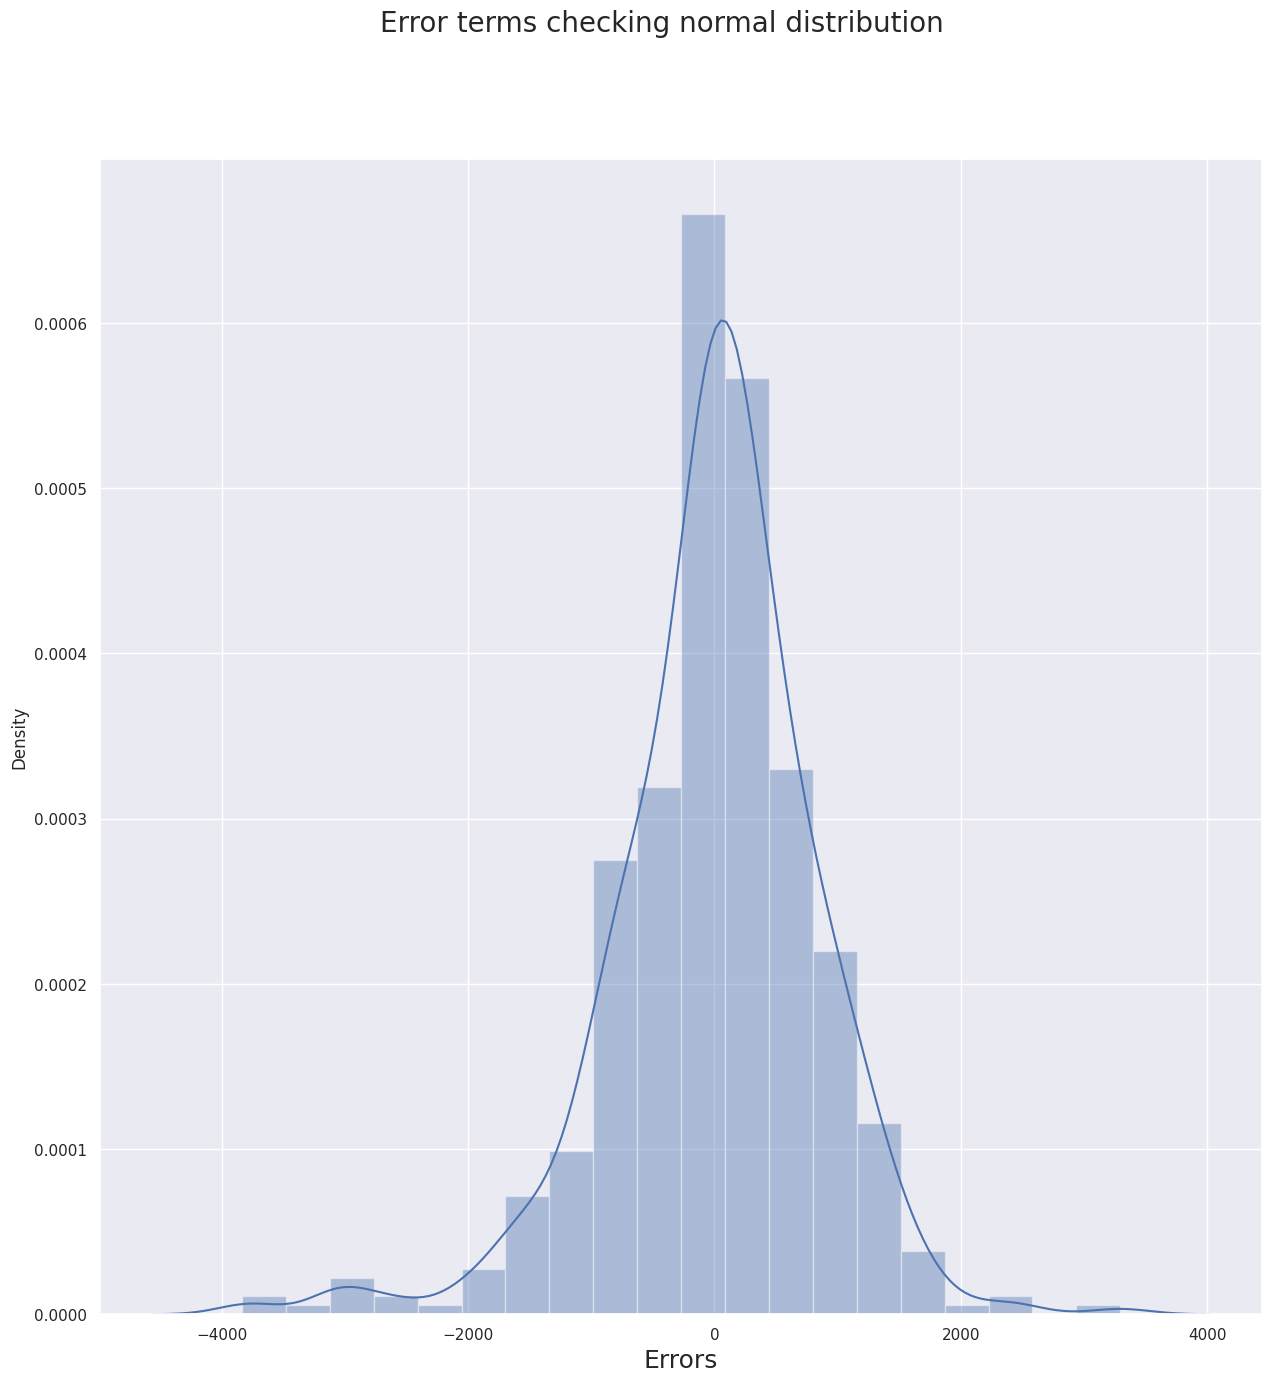

In [167]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error terms checking normal distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- **The training error terms are normally distributed confirming the assumption of linear regression**

<Axes: >

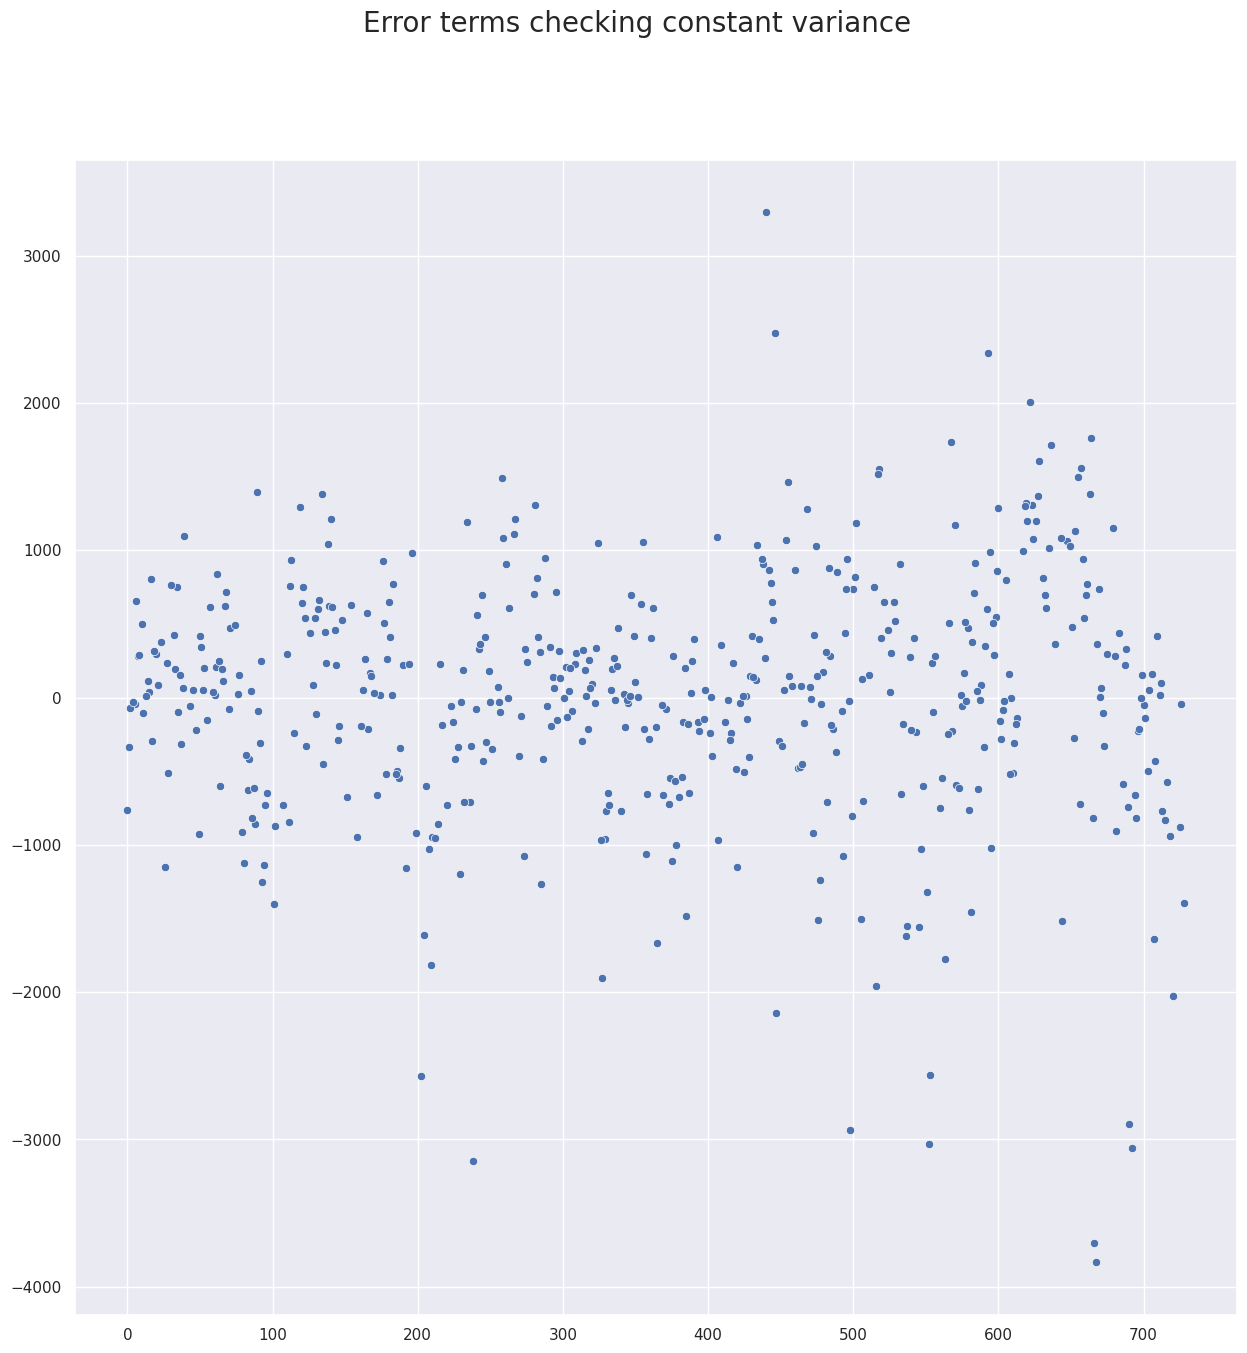

In [168]:
# Plotting error terms to check for constant variance

fig = plt.figure()
fig.suptitle('Error terms checking constant variance', fontsize = 20)   
sns.scatterplot((y_train - y_train_pred))

- **This graph shows that the error terms showcase constant variance abiding assumptions of linear regression**

## 5. Prediction and evaluation

In [169]:
# Get the final columns from feature selection

x_test_col = x_test[x_train_rfe.columns]

# Scale the data to range from 0-1
x_test_norm = pd.DataFrame(scaler.fit_transform(x_test_col), index=x_test_col.index, columns=x_test_col.columns)
X = sm.add_constant(x_test_norm)

y_test_pred = lm_7.predict(X)

In [170]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print(mse)
print(r_squared)

697062.3107247523
0.8057429073194509


Text(0.5, 0, 'Errors')

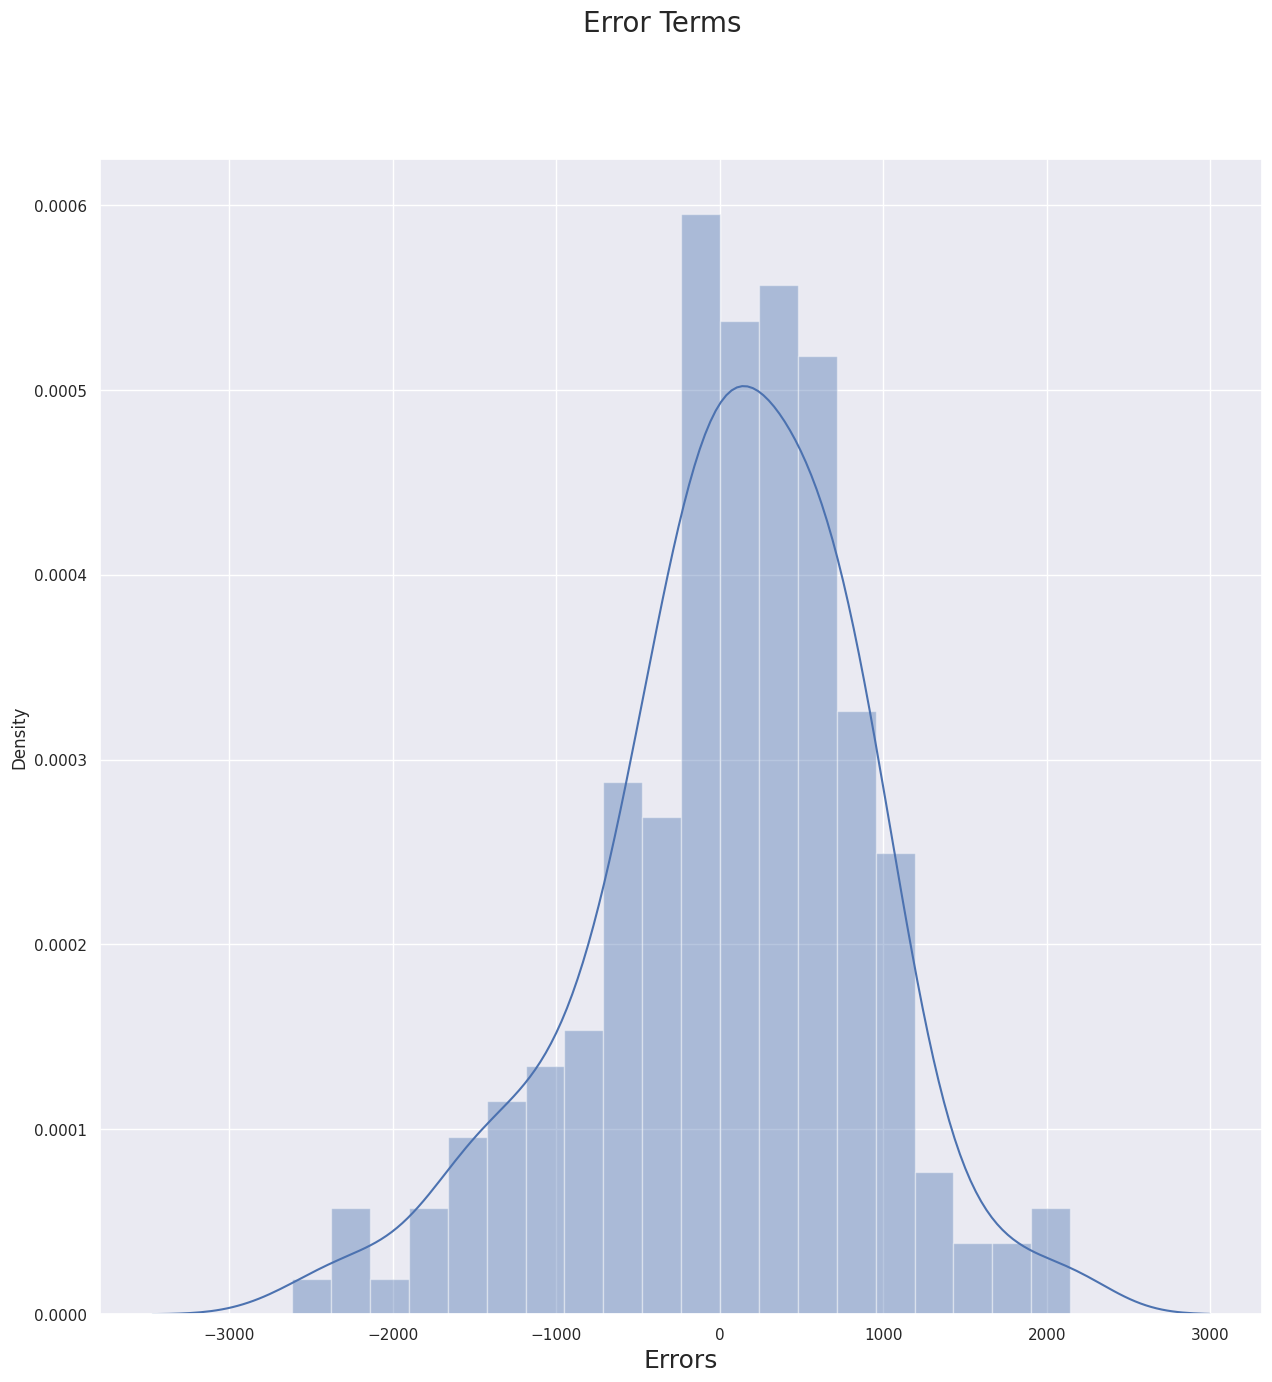

In [171]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

<Axes: >

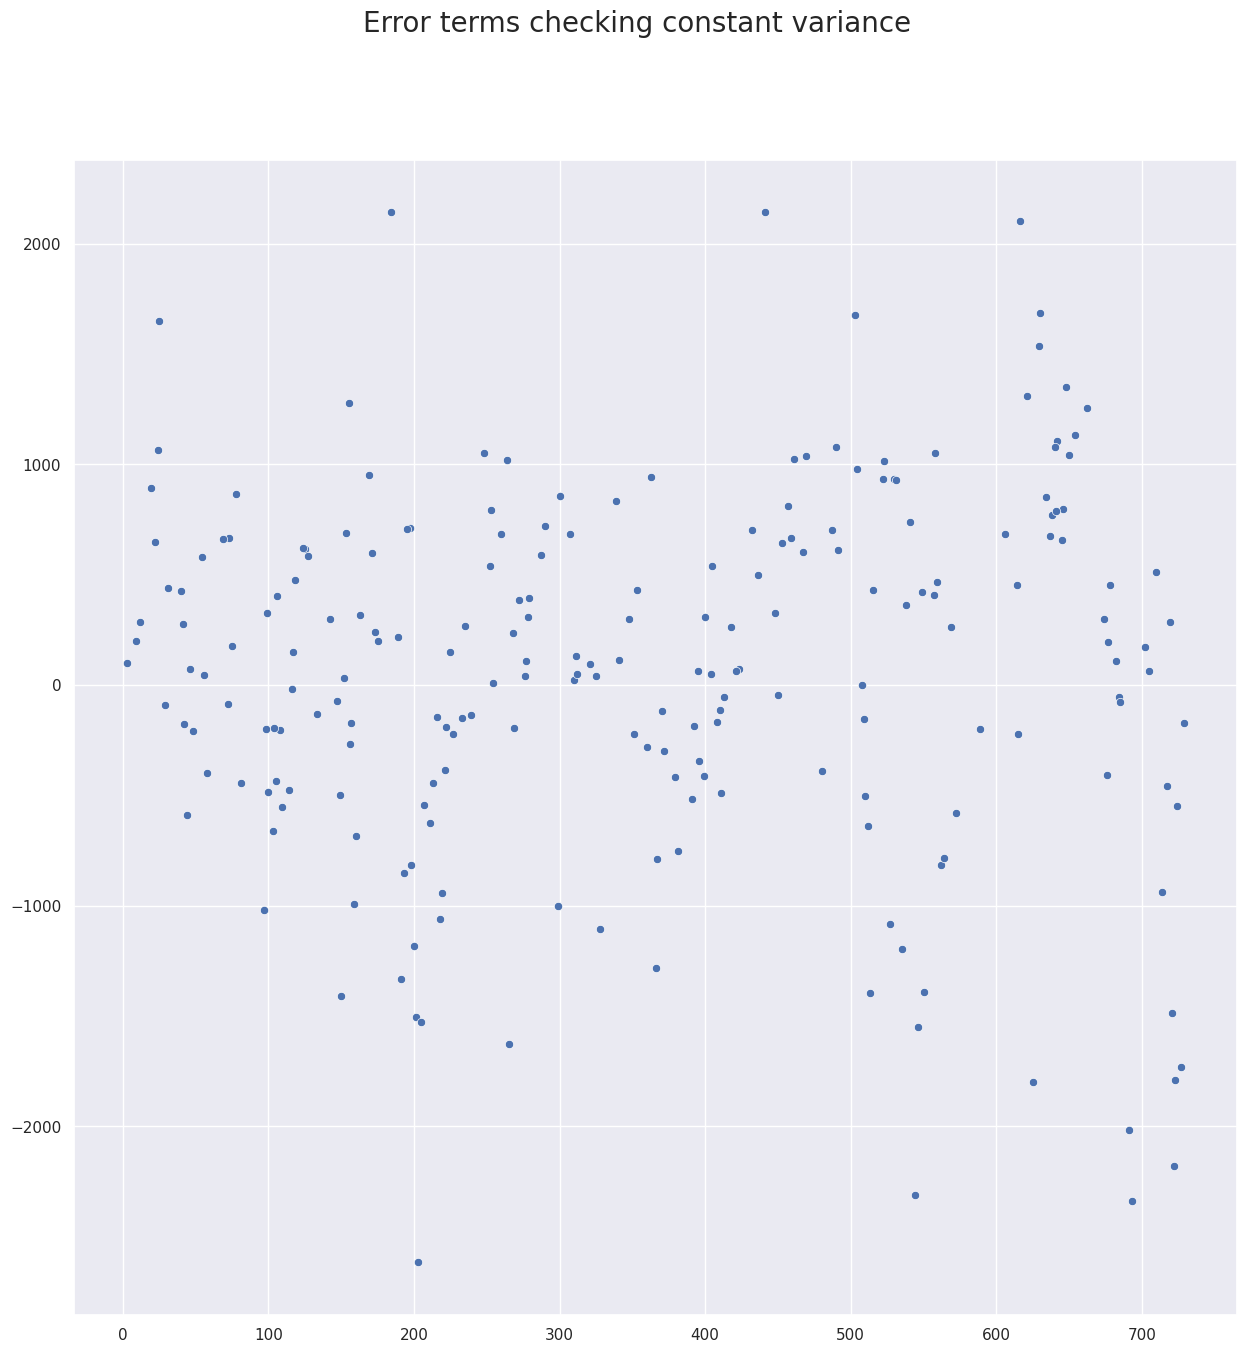

In [172]:
# Plotting error terms to check for constant variance

fig = plt.figure()
fig.suptitle('Error terms checking constant variance', fontsize = 20)   
sns.scatterplot((y_test - y_test_pred))

- **Both normally distributed and constant variance has been checked and found to be true in test data,which confirms the assumptions of linear regression.**

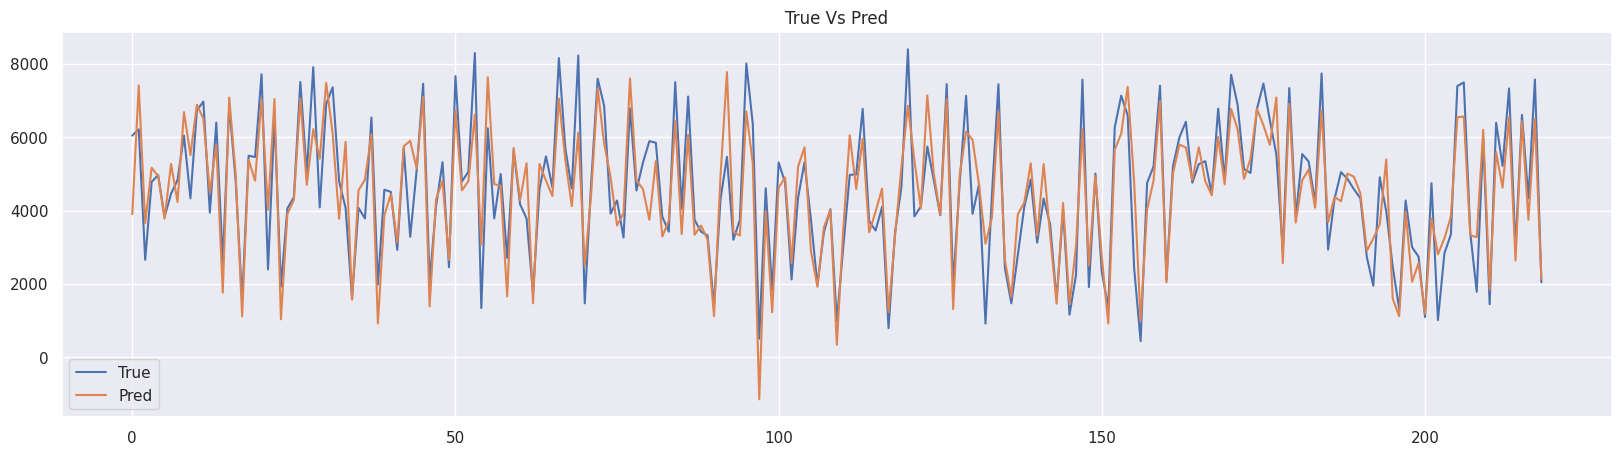

In [173]:
# Plot a graph with y_test and y_test_pred

plt.figure(figsize=(20, 5))
x = range(len(y_test))
plt.plot(x, y_test, label ='True')
plt.plot(x, y_test_pred, label ='Pred')
plt.legend()
plt.title('True Vs Pred')
plt.show()

- We can assure here most of the predicted values try to match up with true values

## Model metrics

- **R square of the final model - 0.815**
- **Adjusted R square of final model - 0.812**

*They both doesn't have much difference which somewhat implies we have used right number of parameters*

- **R square of test data - 0.81**

*This implies that 80% percent variation of data could be explained by our model*

- **Coefficients of our best fit line**

<span style="color:green">*y= (1405.29)const + (2039.84)yr + (491.41)workingday + (4058.85)atemp + (-1066.45)spring + (429.78)winter + (559.61)saturday + (-2559.98)light_snow + (-666.0)mist*</span>

**Important features**

* **atemp** ranks first in its significance to predict target variable.When atemp increases no.of renters also increase.
* **Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** weather affects the renters number next , this weather reduces the number of renters.
* Next,**Spring** season affects the number of renters in a negative way.

